# KL-analysis

ref: http://joschu.net/blog/kl-approx.html

# 三种KL的均值和方差

标准的KL是：每个类别的概率都要做KL， 

In [1]:
import torch.distributions as dis
p = dis.Normal(loc=0, scale=1)
q = dis.Normal(loc=0.5, scale=1)
print(p.sample(sample_shape=(10,)))
print(q.sample(sample_shape=(10,)))

tensor([ 1.3994, -2.2573,  1.3038, -0.9967, -0.1091,  2.4697, -0.9874,  0.1029,
        -1.2084, -0.0206])

tensor([-0.1426, -0.1394,  0.1749,  0.8130,  0.5950,  0.2418,  0.1489,  1.8157,
        -0.1066,  0.1575])

In [2]:
p = dis.Normal(loc=0, scale=1)
q = dis.Normal(loc=0.5, scale=1)
x = q.sample(sample_shape=(100_000,))
truekl = dis.kl_divergence(p, q)
print("true", truekl)
logr = p.log_prob(x) - q.log_prob(x)
k1 = -logr # 这个版本是logprob版本
k2 = logr ** 2 / 2
k3 = (logr.exp() - 1) - logr

print('------')
print('KL的均值和标准差')
for i, k in enumerate((k1, k2, k3)):
    # 注意：相较原KL差异
    print(i+1, k.mean() , k.std())
    
print('------')
print('与标准KL比较')
for i, k in enumerate((k1, k2, k3)):
    # 注意：相较原KL差异
    print(i+1, (k.mean() - truekl) / truekl, k.std() / truekl)
 

true tensor(0.1250)

------

KL的均值和标准差

1 tensor(0.1248) tensor(0.4984)

2 tensor(0.1320) tensor(0.1863)

3 tensor(0.1242) tensor(0.1835)

------

与标准KL比较

1 tensor(-0.0019) tensor(3.9872)

2 tensor(0.0559) tensor(1.4901)

3 tensor(-0.0060) tensor(1.4679)

In [3]:
# K2 和 K3 的 KL 值都是正值， K1有负值
print(len(x))
print(k1[:10])
print(k2[:10])
print(k3[:10])

100000

tensor([-0.0102, -0.5325,  0.4275, -0.0606,  0.2828, -0.1185, -0.1906,  0.8340,
        -0.0640,  0.0836])

tensor([5.1907e-05, 1.4177e-01, 9.1382e-02, 1.8374e-03, 3.9981e-02, 7.0211e-03,
        1.8156e-02, 3.4779e-01, 2.0453e-03, 3.4954e-03])

tensor([5.2035e-05, 1.7068e-01, 7.9641e-02, 1.8752e-03, 3.6465e-02, 7.3068e-03,
        1.9366e-02, 2.6832e-01, 2.0896e-03, 3.4000e-03])

# K1 散点分布

1. 均值为0，即在y轴对称
2. 由于有负值，所以方差大

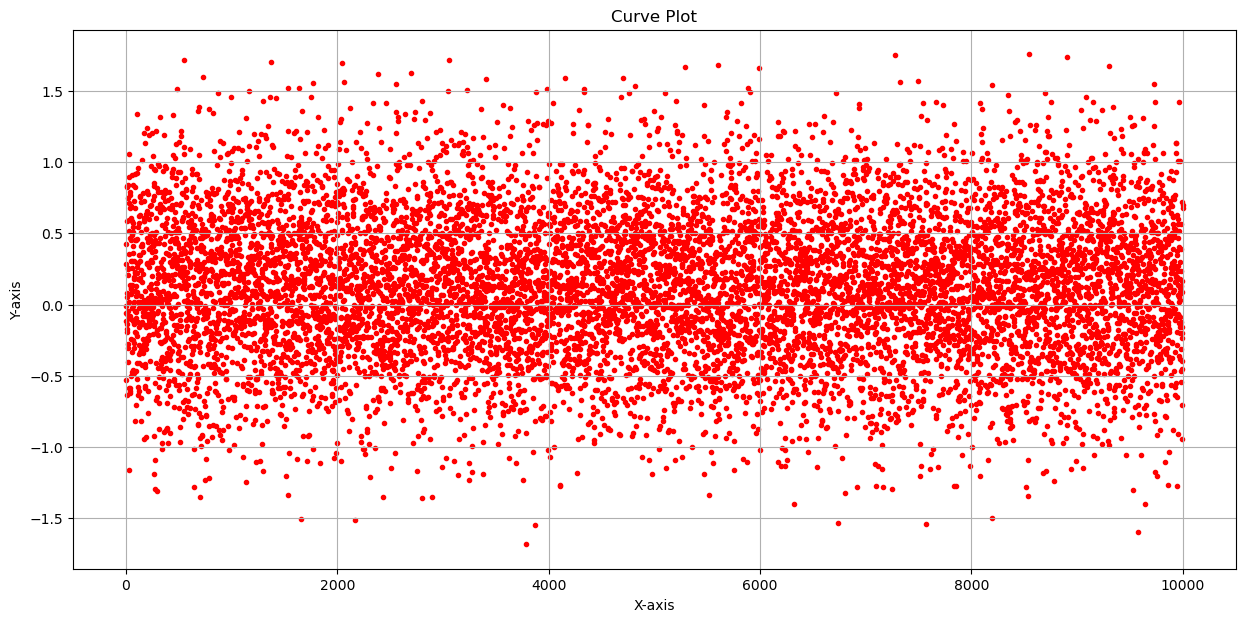

In [4]:
import torch
import matplotlib.pyplot as plt

sample_num = 10000

# 绘制曲线图
plt.figure(figsize=(15, 7))
plt.scatter(range(sample_num), k1[:sample_num].tolist(), color='red', marker='.')  # 使用 marker='o' 来显示数据点
plt.title('Curve Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.show()

# K2,K3 散点图

下图明显K3的K2, 都是正值

In [5]:
# k3均值更小。
print(k2.mean())
print(k3.mean())

tensor(0.1320)

tensor(0.1242)

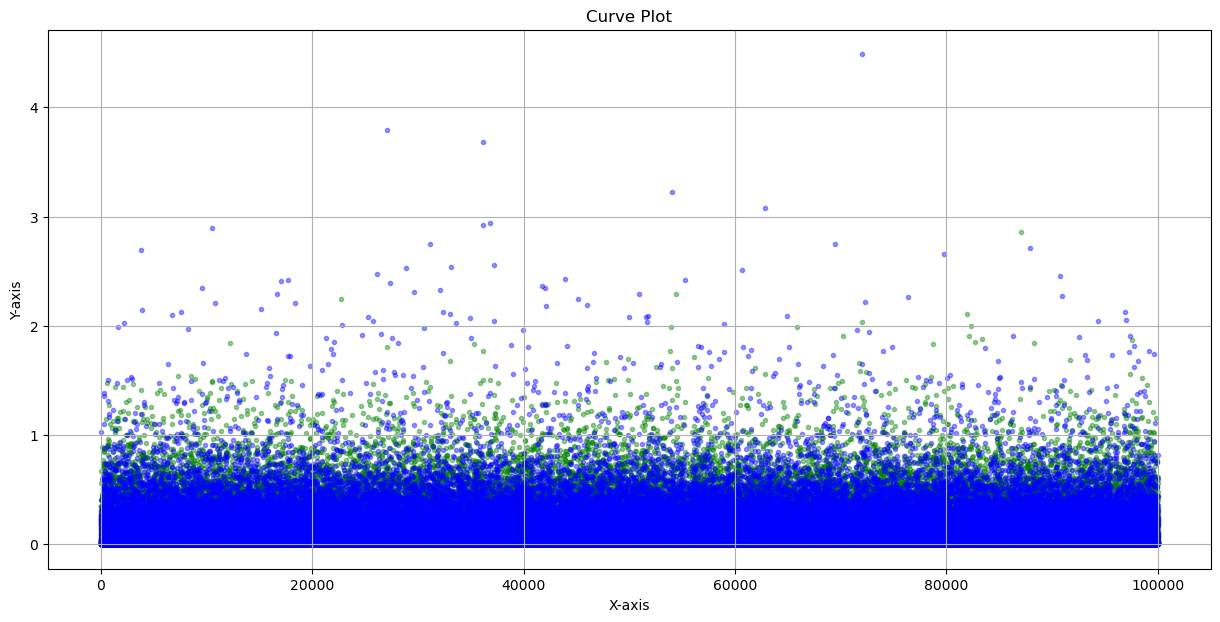

In [6]:
import torch
import matplotlib.pyplot as plt

# # 示例数据

sample_num = 100000

# 绘制曲线图
plt.figure(figsize=(15, 7))
plt.scatter(range(sample_num), k2[:sample_num].tolist(), color='green', marker='.', alpha=0.4)  # 使用 marker='o' 来显示数据点
plt.scatter(range(sample_num), k3[:sample_num].tolist(), color='blue', marker='.', alpha=0.4)  # 使用 marker='o' 来显示数据点
plt.title('Curve Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.show()

# 不同KL随 qx/px 变化

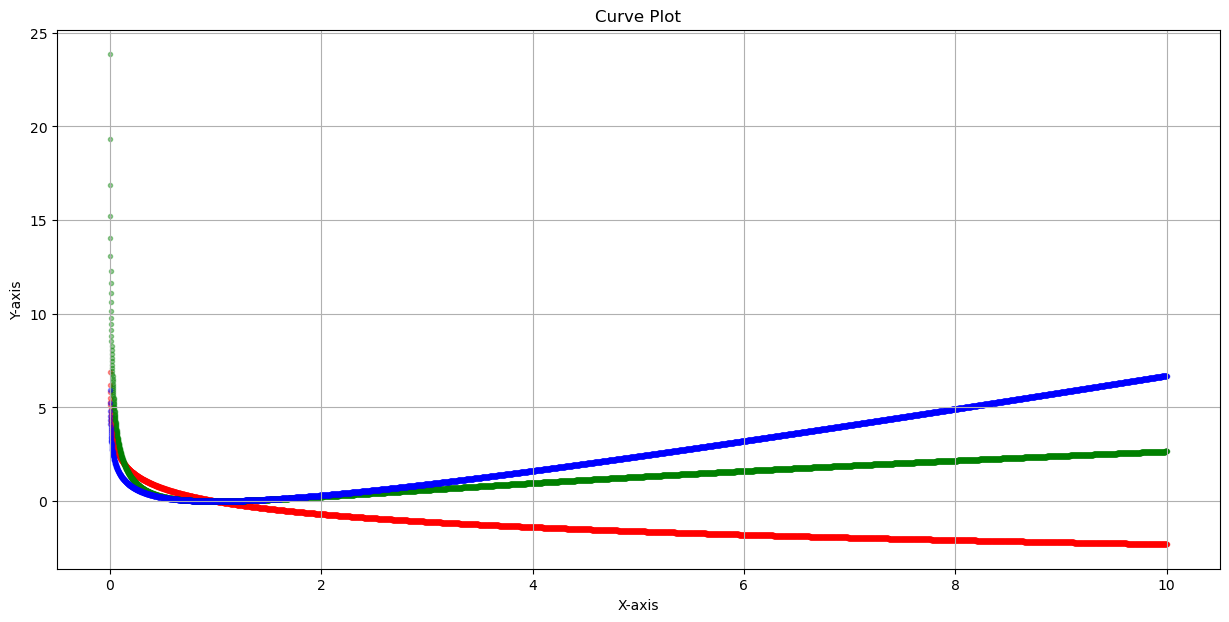

In [7]:
import torch
import matplotlib.pyplot as plt


x = torch.arange(0, 10.001, 0.001)
y1 = -x.log()
y2 = x.log()**2 / 2
y3 = x-1 - x.log()


# 绘制曲线图
plt.figure(figsize=(15, 7))
plt.scatter(x.tolist(), y1.tolist(), color='red', marker='.', alpha=0.4)  # 使用 marker='o' 来显示数据点
plt.scatter(x.tolist(), y2.tolist(), color='green', marker='.', alpha=0.4)  # 使用 marker='o' 来显示数据点
plt.scatter(x.tolist(), y3.tolist(), color='blue', marker='.', alpha=0.4)  # 使用 marker='o' 来显示数据点
plt.title('Curve Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.show()

# K3 (x-1) > x.log() 图像

保证 r-1 - r.log() , 恒为正值

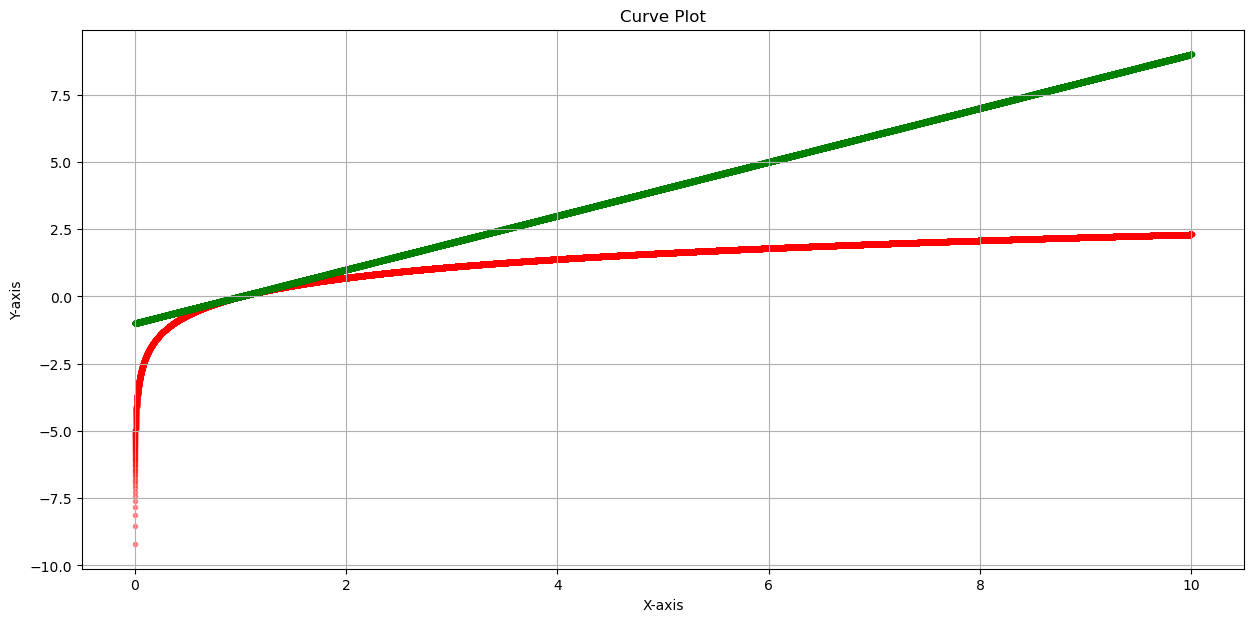

In [8]:
import torch
import matplotlib.pyplot as plt


x = torch.arange(0, 10.001, 0.0001) # 要求 log(r), r>0, r=p(x)/q(x)
y1 = x.log()
y2 = x - 1


# 绘制曲线图
plt.figure(figsize=(15, 7))
plt.scatter(x.tolist(), y1.tolist(), color='red', marker='.', alpha=0.4)  # 使用 marker='o' 来显示数据点
plt.scatter(x.tolist(), y2.tolist(), color='green', marker='.', alpha=0.4)  # 使用 marker='o' 来显示数据点
plt.title('Curve Plot')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid()
plt.show()